In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

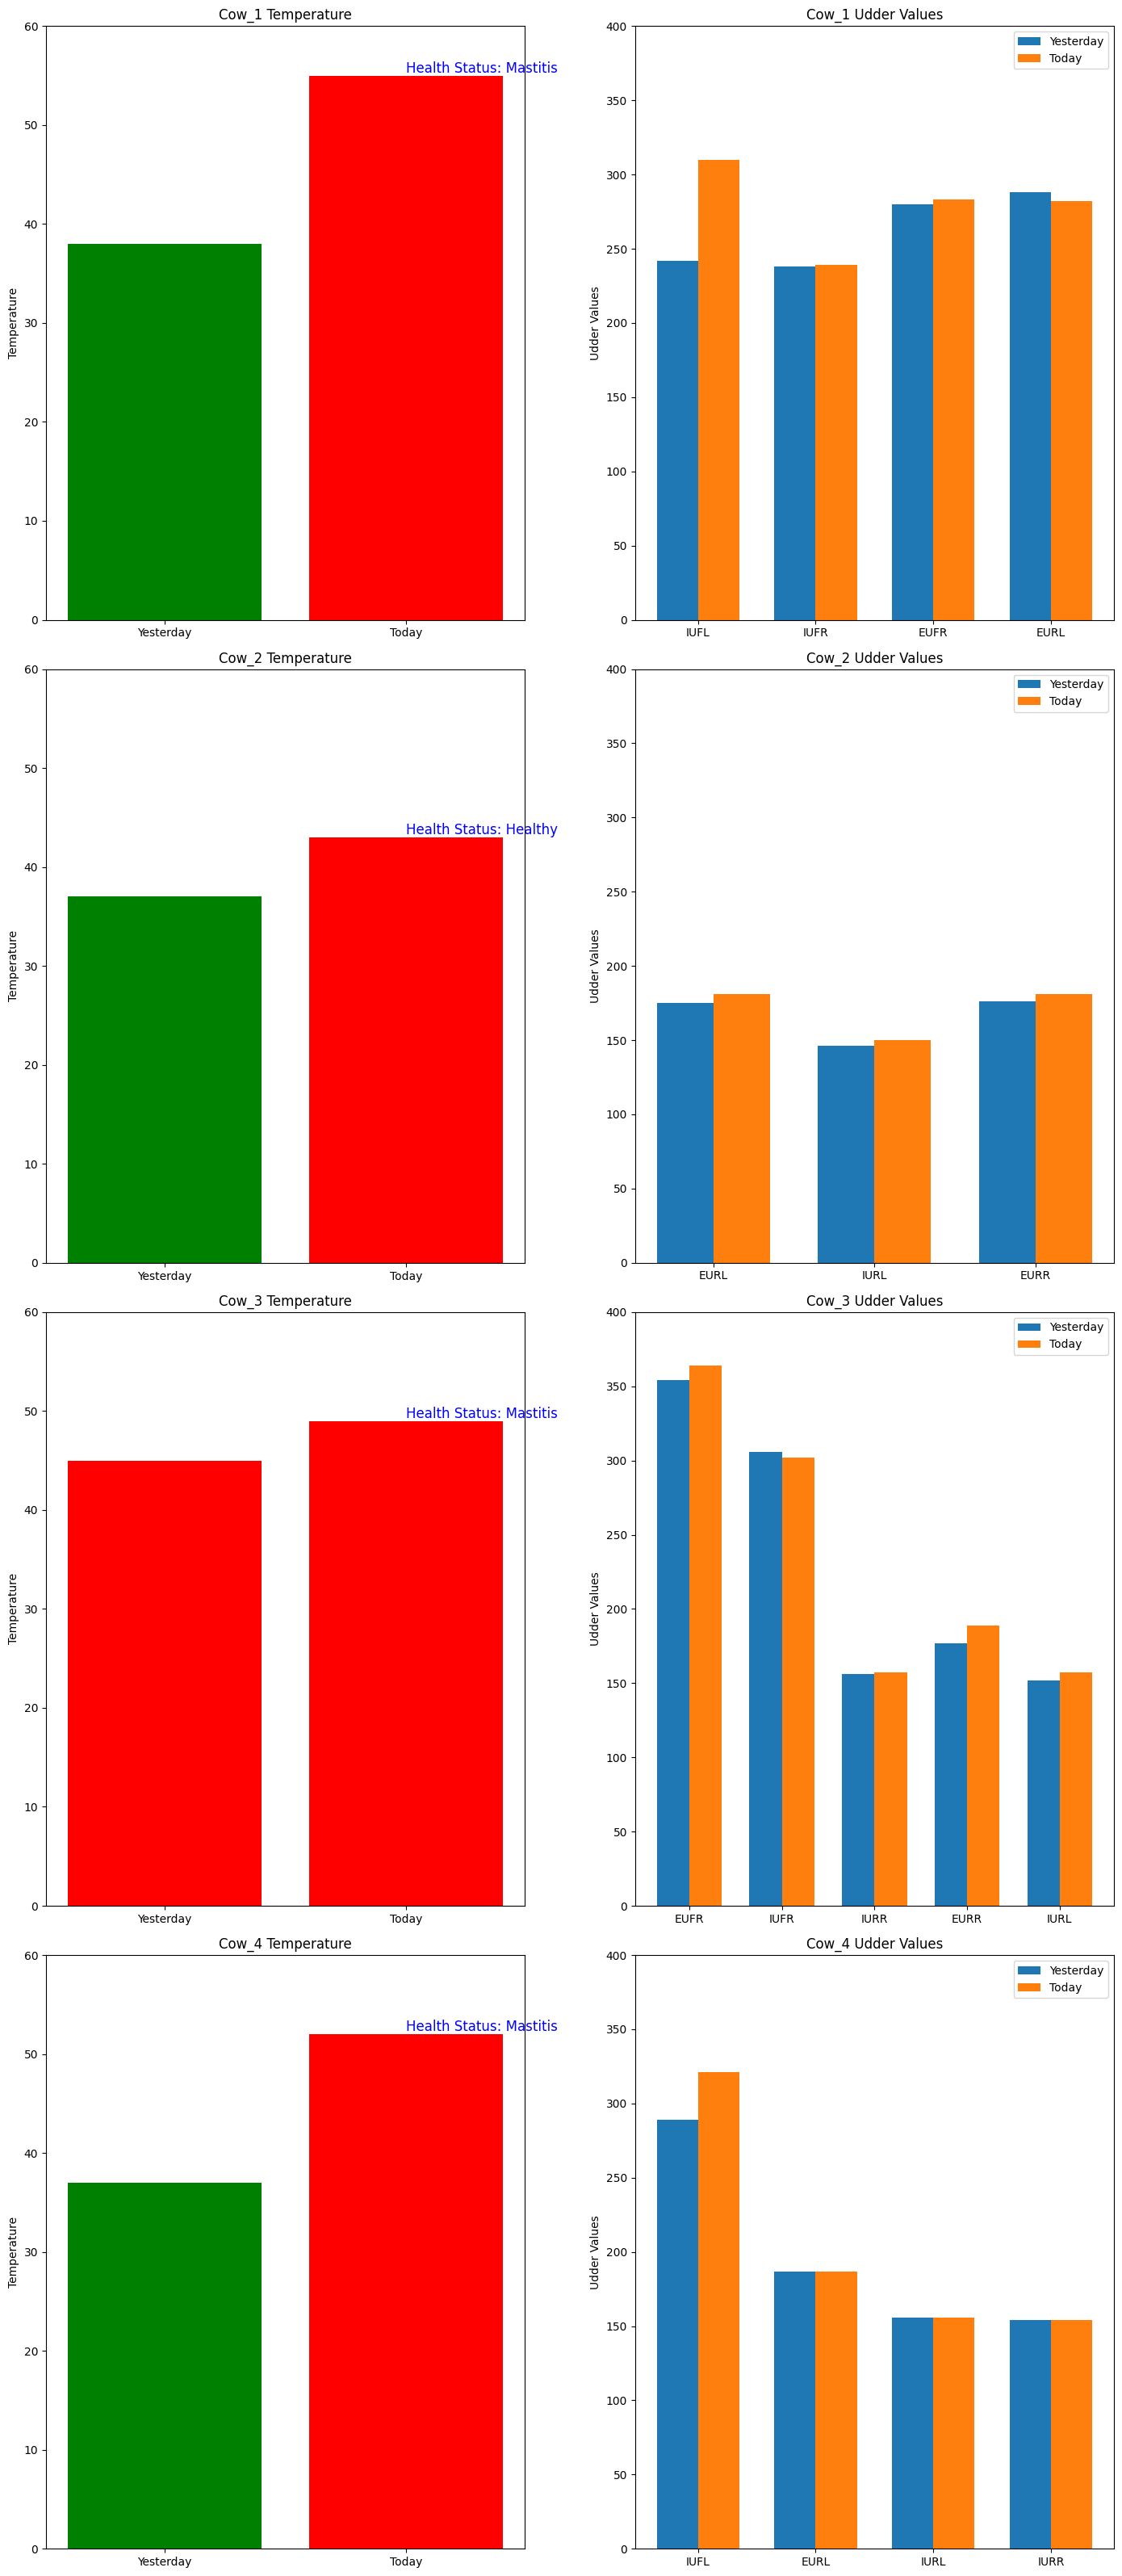

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Example data
data = {
    'Months_after_giving_birth': [3, 3, 4, 4, 6, 3, 1, 1],
    'IUFL': [242, 310, 146, 150, 160, 161, 289, 321],
    'EUFL': [280, 354, 176, 180, 178, 185, 290, 364],
    'IUFR': [238, 239, 146, 150, 306, 302, 157, 157],
    'EUFR': [280, 283, 177, 180, 354, 364, 189, 189],
    'IURL': [240, 239, 146, 150, 152, 157, 156, 156],
    'EURL': [288, 282, 175, 181, 180, 190, 187, 187],
    'IURR': [242, 235, 145, 150, 156, 157, 154, 154],
    'EURR': [281, 278, 176, 181, 177, 189, 183, 183],
    'Temperature': [38, 55, 37, 43, 45, 49, 37, 52],
    'Health': [0, 1, 0, 0, 1, 1, 1, 1],
    'ID': ['Cow_1', 'Cow_1', 'Cow_2', 'Cow_2', 'Cow_3', 'Cow_3', 'Cow_4', 'Cow_4'],
    'Contributing factors': [
        'IUFL,IUFR,EUFR,EURL', 
        'IUFL,IUFR,EUFR,EURL', 
        'EURL,IURL,EURR', 
        'IURL,EURL', 
        'EUFR,IUFR,IURR,EURR,IURL', 
        'IUFR,EUFR,EUFL,EURR,IURR,EURL', 
        'IUFL,EURL,IURL,IURR', 
        'IUFL,EUFL,EURL,IURL'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define a function to plot the data for each cow
def plot_cow_data(df):
    cows = df['ID'].unique()
    fig, axes = plt.subplots(len(cows), 2, figsize=(14, 8 * len(cows)))

    for i, cow in enumerate(cows):
        cow_data = df[df['ID'] == cow]
        
        # Plot temperature
        temp_colors = []
        for temp in cow_data['Temperature']:
            if temp > 41:
                temp_colors.append('red')
            elif temp > 39:
                temp_colors.append('yellow')
            else:
                temp_colors.append('green')
        
        axes[i, 0].bar(['Yesterday', 'Today'], cow_data['Temperature'], color=temp_colors)
        axes[i, 0].set_ylim(0, 60)
        axes[i, 0].set_title(f'{cow} Temperature')
        axes[i, 0].set_ylabel('Temperature')
        health_status = "Mastitis" if cow_data['Health'].iloc[1] == 1 else "Healthy"
        axes[i, 0].text(1, cow_data['Temperature'].iloc[1], f"Health Status: {health_status}", 
                        color='blue', fontsize=12, ha='left', va='bottom')

        # Plot udder values based on contributing factors
        factors = cow_data['Contributing factors'].iloc[0].split(',')
        width = 0.35  # width of the bars
        x = np.arange(len(factors))  # label locations
        
        yesterday_values = cow_data.iloc[0][factors].values
        today_values = cow_data.iloc[1][factors].values
        
        axes[i, 1].bar(x - width/2, yesterday_values, width, label='Yesterday')
        axes[i, 1].bar(x + width/2, today_values, width, label='Today')
        
        axes[i, 1].set_xticks(x)
        axes[i, 1].set_xticklabels(factors)
        axes[i, 1].set_ylim(0, 400)
        axes[i, 1].set_title(f'{cow} Udder Values')
        axes[i, 1].set_ylabel('Udder Values')
        axes[i, 1].legend()

    plt.tight_layout()
    plt.show()

# Plot the data
plot_cow_data(df)


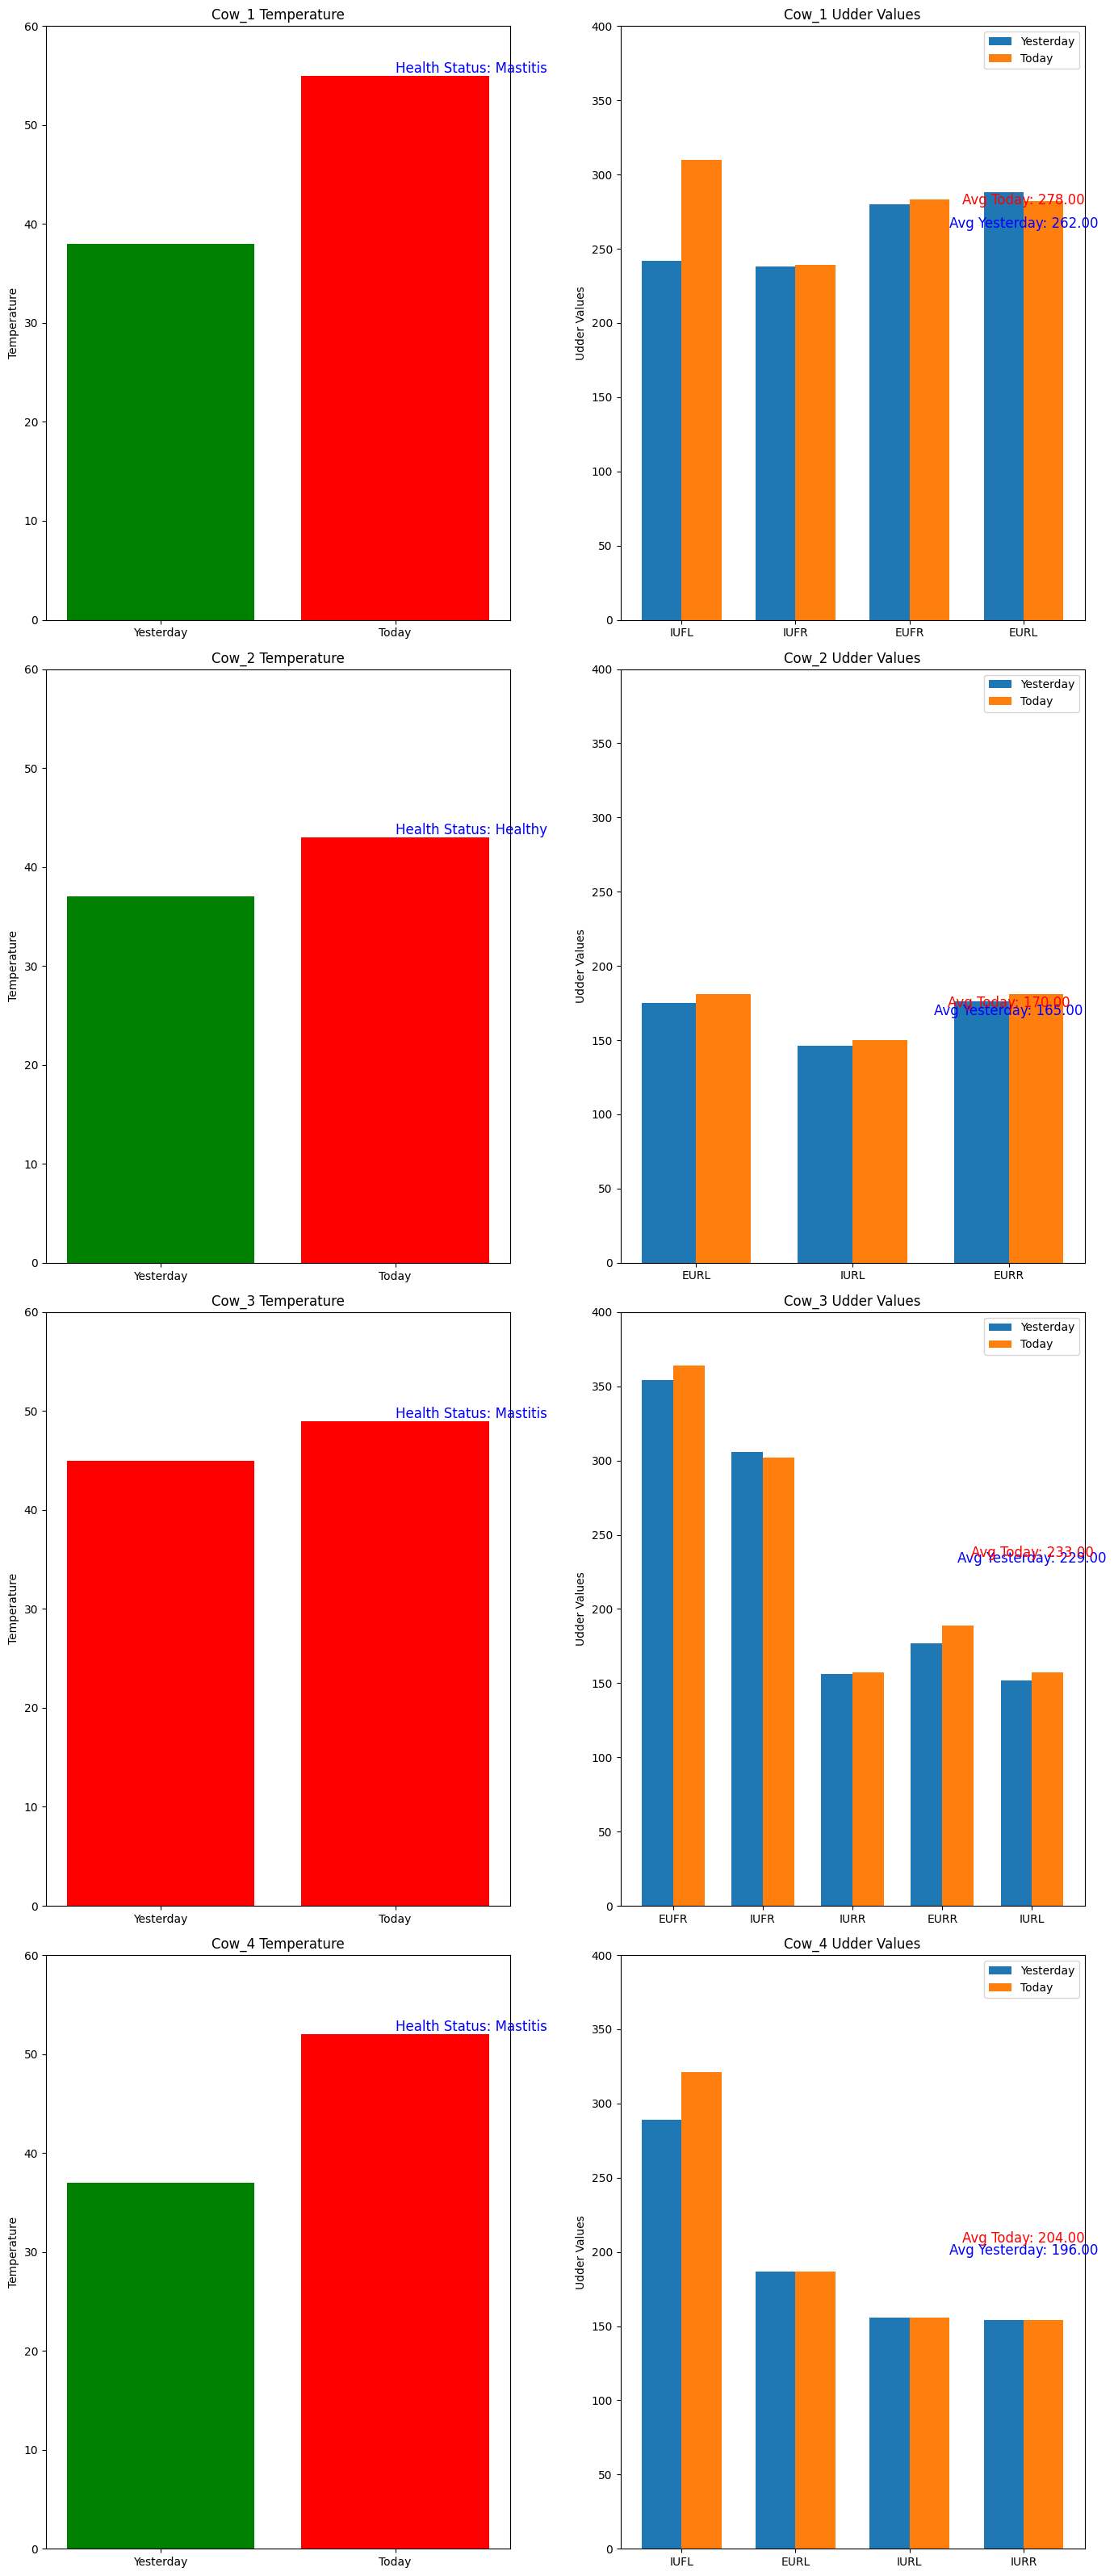

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Example data
data = {
    'Months_after_giving_birth': [3, 3, 4, 4, 6, 3, 1, 1],
    'IUFL': [242, 310, 146, 150, 160, 161, 289, 321],
    'EUFL': [280, 354, 176, 180, 178, 185, 290, 364],
    'IUFR': [238, 239, 146, 150, 306, 302, 157, 157],
    'EUFR': [280, 283, 177, 180, 354, 364, 189, 189],
    'IURL': [240, 239, 146, 150, 152, 157, 156, 156],
    'EURL': [288, 282, 175, 181, 180, 190, 187, 187],
    'IURR': [242, 235, 145, 150, 156, 157, 154, 154],
    'EURR': [281, 278, 176, 181, 177, 189, 183, 183],
    'Temperature': [38, 55, 37, 43, 45, 49, 37, 52],
    'Health': [0, 1, 0, 0, 1, 1, 1, 1],
    'ID': ['Cow_1', 'Cow_1', 'Cow_2', 'Cow_2', 'Cow_3', 'Cow_3', 'Cow_4', 'Cow_4'],
    'Contributing factors': [
        'IUFL,IUFR,EUFR,EURL', 
        'IUFL,IUFR,EUFR,EURL', 
        'EURL,IURL,EURR', 
        'IURL,EURL', 
        'EUFR,IUFR,IURR,EURR,IURL', 
        'IUFR,EUFR,EUFL,EURR,IURR,EURL', 
        'IUFL,EURL,IURL,IURR', 
        'IUFL,EUFL,EURL,Temperature,IURL'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define a function to plot the data for each cow
def plot_cow_data(df):
    cows = df['ID'].unique()
    fig, axes = plt.subplots(len(cows), 2, figsize=(14, 8 * len(cows)))

    for i, cow in enumerate(cows):
        cow_data = df[df['ID'] == cow]
        
        # Plot temperature
        temp_colors = []
        for temp in cow_data['Temperature']:
            if temp > 41:
                temp_colors.append('red')
            elif temp > 39:
                temp_colors.append('yellow')
            else:
                temp_colors.append('green')
        
        axes[i, 0].bar(['Yesterday', 'Today'], cow_data['Temperature'], color=temp_colors)
        axes[i, 0].set_ylim(0, 60)
        axes[i, 0].set_title(f'{cow} Temperature')
        axes[i, 0].set_ylabel('Temperature')
        health_status = "Mastitis" if cow_data['Health'].iloc[1] == 1 else "Healthy"
        axes[i, 0].text(1, cow_data['Temperature'].iloc[1], f"Health Status: {health_status}", 
                        color='blue', fontsize=12, ha='left', va='bottom')

        # Plot udder values based on contributing factors
        factors = cow_data['Contributing factors'].iloc[0].split(',')
        width = 0.35  # width of the bars
        x = np.arange(len(factors))  # label locations
        
        yesterday_values = cow_data.iloc[0][factors].values
        today_values = cow_data.iloc[1][factors].values

        avg_yesterday = np.mean(yesterday_values)
        avg_today = np.mean(today_values)
        
        axes[i, 1].bar(x - width/2, yesterday_values, width, label='Yesterday')
        axes[i, 1].bar(x + width/2, today_values, width, label='Today')
        
        axes[i, 1].set_xticks(x)
        axes[i, 1].set_xticklabels(factors)
        axes[i, 1].set_ylim(0, 400)
        axes[i, 1].set_title(f'{cow} Udder Values')
        axes[i, 1].set_ylabel('Udder Values')
        axes[i, 1].legend()

        # Add average udder values text
        axes[i, 1].text(len(factors) - 1, avg_yesterday, f'Avg Yesterday: {avg_yesterday:.2f}', 
                        color='blue', fontsize=12, ha='center', va='bottom')
        axes[i, 1].text(len(factors) - 1, avg_today, f'Avg Today: {avg_today:.2f}', 
                        color='red', fontsize=12, ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Plot the data
plot_cow_data(df)


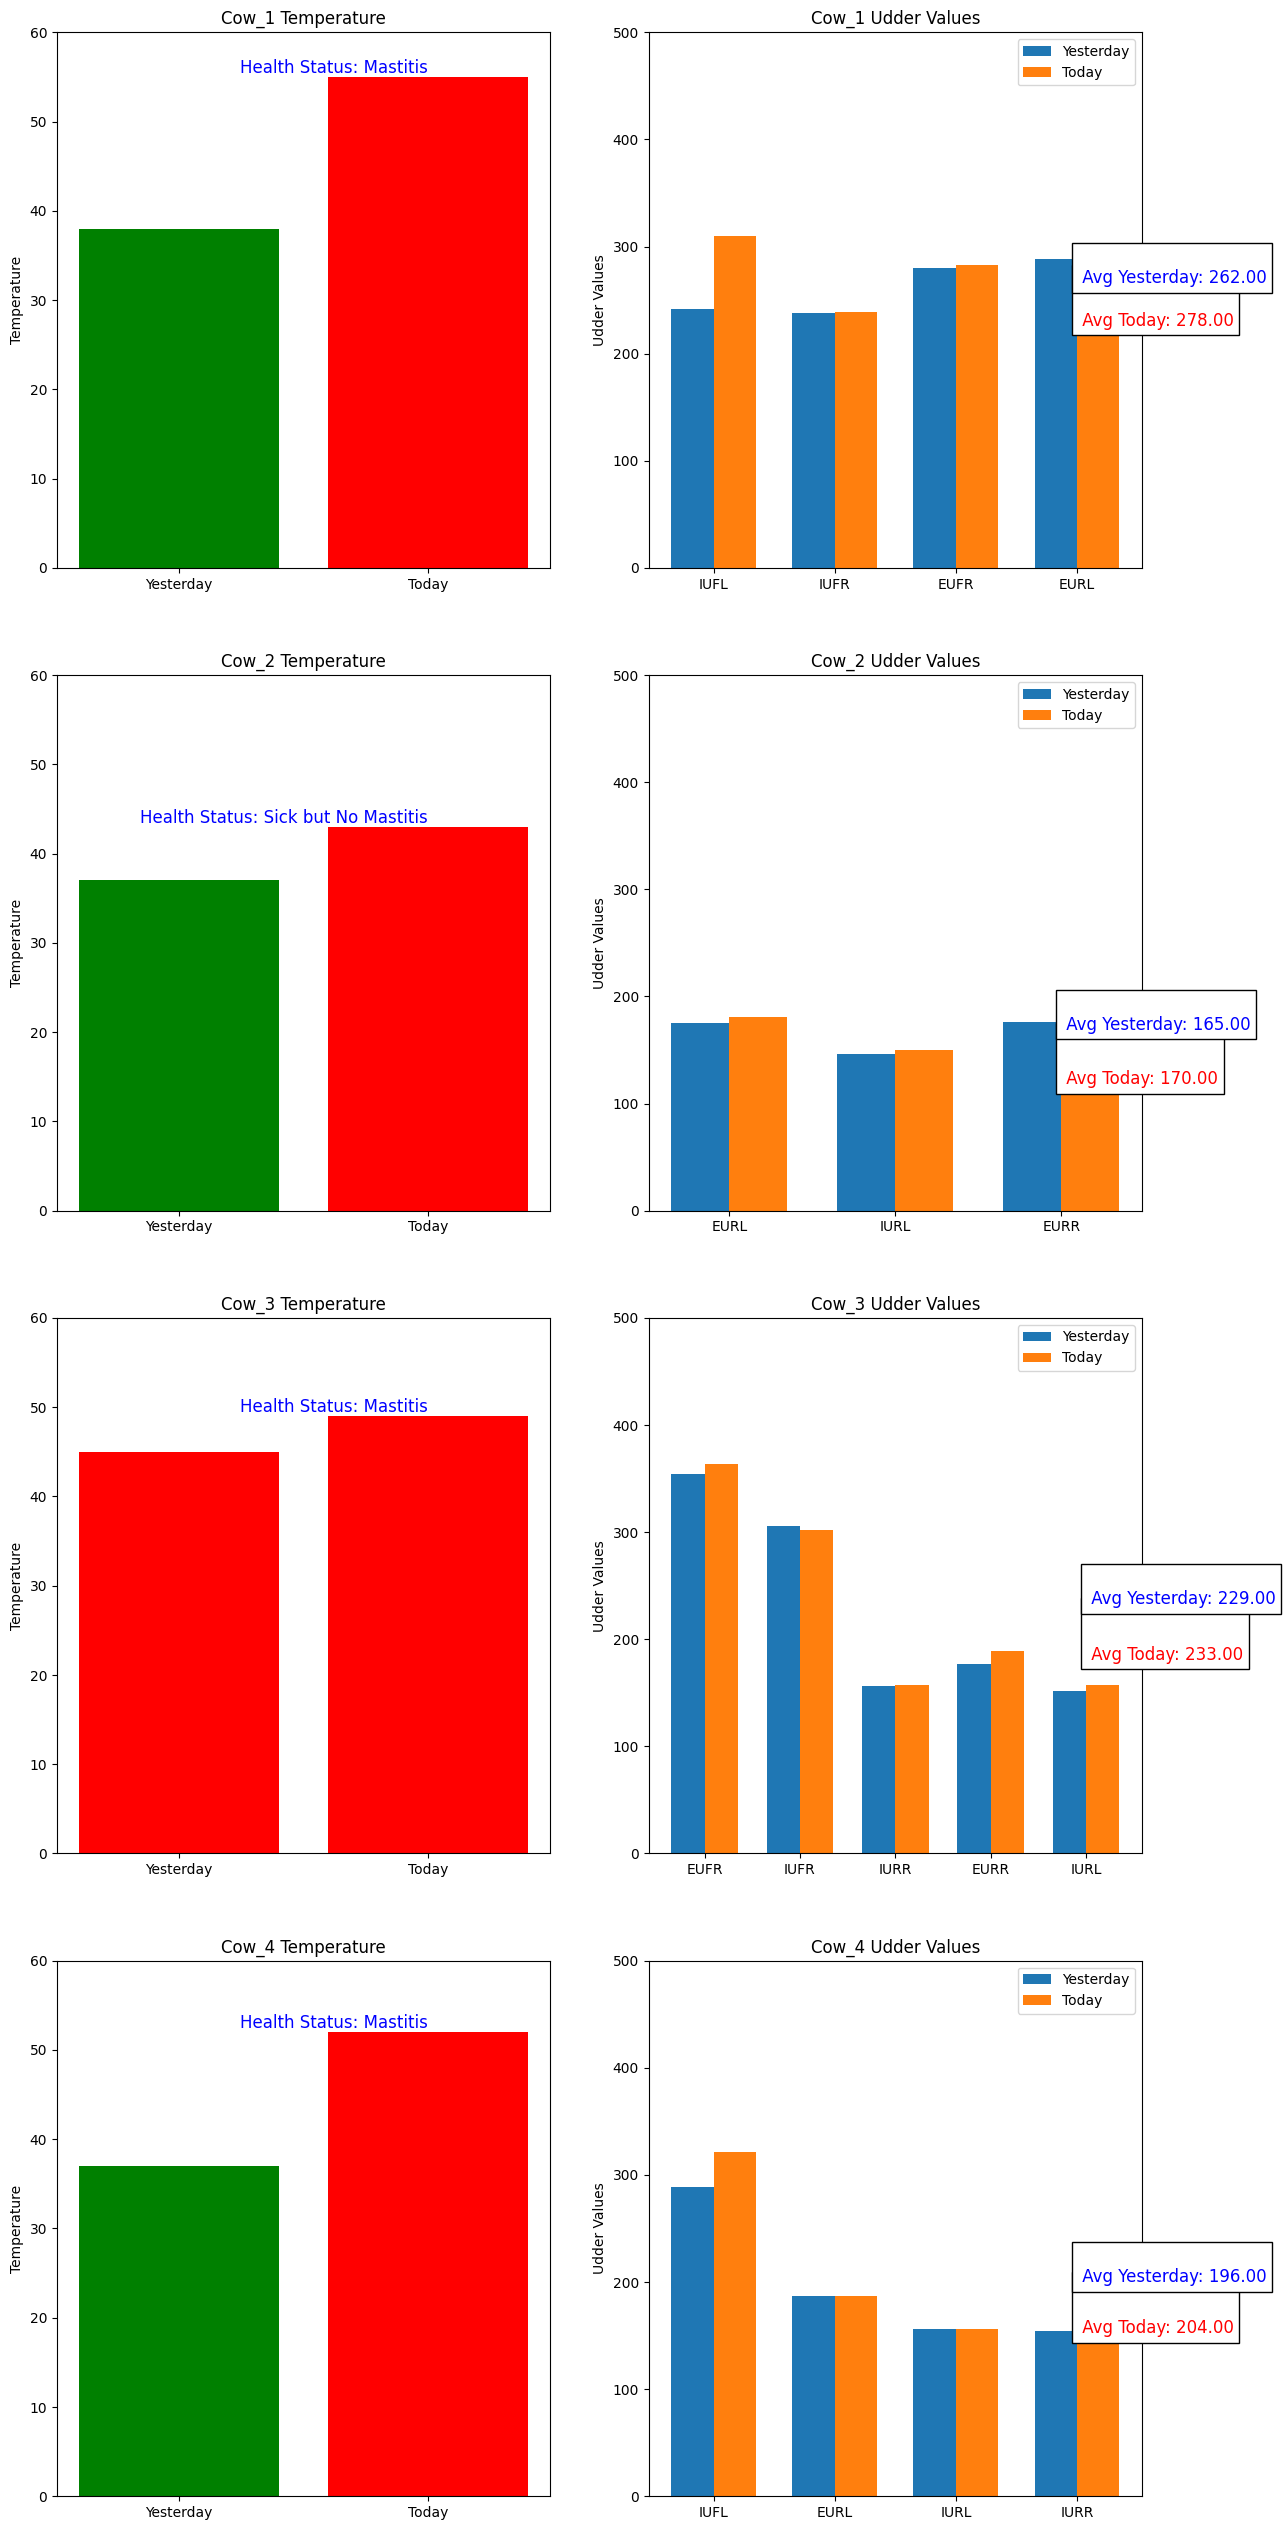

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Example data
data = {
    'Months_after_giving_birth': [3, 3, 4, 4, 6, 3, 1, 1],
    'IUFL': [242, 310, 146, 150, 160, 161, 289, 321],
    'EUFL': [280, 354, 176, 180, 178, 185, 290, 364],
    'IUFR': [238, 239, 146, 150, 306, 302, 157, 157],
    'EUFR': [280, 283, 177, 180, 354, 364, 189, 189],
    'IURL': [240, 239, 146, 150, 152, 157, 156, 156],
    'EURL': [288, 282, 175, 181, 180, 190, 187, 187],
    'IURR': [242, 235, 145, 150, 156, 157, 154, 154],
    'EURR': [281, 278, 176, 181, 177, 189, 183, 183],
    'Temperature': [38, 55, 37, 43, 45, 49, 37, 52],
    'Health': [0, 1, 0, 0, 1, 1, 1, 1],
    'ID': ['Cow_1', 'Cow_1', 'Cow_2', 'Cow_2', 'Cow_3', 'Cow_3', 'Cow_4', 'Cow_4'],
    'Contributing factors': [
        'IUFL,IUFR,EUFR,EURL', 
        'IUFL,IUFR,EUFR,EURL', 
        'EURL,IURL,EURR', 
        'IURL,EURL', 
        'EUFR,IUFR,IURR,EURR,IURL', 
        'IUFR,EUFR,EUFL,EURR,IURR,EURL', 
        'IUFL,EURL,IURL,IURR', 
        'IUFL,EUFL,EURL,IURL'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define a function to plot the data for each cow
def plot_cow_data(df):
    cows = df['ID'].unique()
    fig, axes = plt.subplots(len(cows), 2, figsize=(14, 8 * len(cows)))

    udder_legend = {
        'IUFL': 'front left udder inhale limit',
        'EUFL': 'front left udder exhale limit',
        'IUFR': 'front right udder inhale limit',
        'EUFR': 'front right udder exhale limit',
        'IURL': 'rear left udder inhale limit ',
        'EURL': 'rear left udder exhale limit',
        'IURR': 'rear right udder inhale limit',
        'EURR': 'rear right udder exhale limit'
    }

    for i, cow in enumerate(cows):
        cow_data = df[df['ID'] == cow]
        
        # Plot temperature
        temp_colors = []
        for temp in cow_data['Temperature']:
            if temp > 41:
                temp_colors.append('red')
            elif temp > 39:
                temp_colors.append('yellow')
            else:
                temp_colors.append('green')
        
        axes[i, 0].bar(['Yesterday', 'Today'], cow_data['Temperature'], color=temp_colors)
        axes[i, 0].set_ylim(0, 60)
        axes[i, 0].set_title(f'{cow} Temperature')
        axes[i, 0].set_ylabel('Temperature')
        health_status = "Mastitis" if cow_data['Health'].iloc[1] == 1 else "Sick but No Mastitis"
        axes[i, 0].text(1, cow_data['Temperature'].iloc[1], f"Health Status: {health_status}", 
                        color='blue', fontsize=12, ha='right', va='bottom')

        # Plot udder values based on contributing factors
        factors = cow_data['Contributing factors'].iloc[0].split(',')
        width = 0.35  # width of the bars
        x = np.arange(len(factors))  # label locations
        
        yesterday_values = cow_data.iloc[0][factors].values
        today_values = cow_data.iloc[1][factors].values

        avg_yesterday = np.mean(yesterday_values)
        avg_today = np.mean(today_values)
        
        axes[i, 1].bar(x - width/2, yesterday_values, width, label='Yesterday')
        axes[i, 1].bar(x + width/2, today_values, width, label='Today')
        
        axes[i, 1].set_xticks(x)
        axes[i, 1].set_xticklabels(factors)
        axes[i, 1].set_ylim(0, 500)
        axes[i, 1].set_title(f'{cow} Udder Values')
        axes[i, 1].set_ylabel('Udder Values')
        axes[i, 1].legend(loc='upper right')
       # Add a legend for udder value abbreviations
        handles = [plt.Line2D([0], [0], color='blue', lw=4, label=f'{key}: {value}') for key, value in udder_legend.items()]
        # Add average udder values text
        #axes[i, 1].text(len(factors) - 1, avg_yesterday, f'\n Avg Yesterday: {avg_yesterday:.2f}', 
                        #color='blue', fontsize=12, ha='left', va='top')
        axes[i, 1].text(len(factors) - 1, avg_today, f'\n\n Avg Today: {avg_today:.2f}', 
                        color='red', fontsize=12, ha='left', va='top', bbox=dict(facecolor='white', edgecolor='black'))
        axes[i, 1].text(len(factors) - 1, avg_yesterday, f'\n Avg Yesterday: {avg_yesterday:.2f}', 
                        color='blue', ha='left', va='bottom', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
        #axes[i, 1].legend(handles=handles, loc='upper right', fontsize=12)

    # Add a legend for udder value abbreviations
    handles = [plt.Line2D([0], [0], color='blue', lw=4, label=f'{key}: {value}') for key, value in udder_legend.items()]
    

   # plt.tight_layout()
    plt.savefig('cow_data_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

# Plot the data
plot_cow_data(df)
